In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df=pd.read_csv('Processed_Flipdata.csv')

In [3]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df)

                     Model          Colour  Memory  RAM  Battery_ Rear Camera  \
0          Infinix SMART 7     Night Black      64    4      6000        13MP   
1          Infinix SMART 7      Azure Blue      64    4      6000        13MP   
2             MOTOROLA G32    Mineral Gray     128    8      5000        50MP   
3                 POCO C50      Royal Blue      32    2      5000         8MP   
4          Infinix HOT 30i        Marigold     128    8      5000        50MP   
..                     ...             ...     ...  ...       ...         ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8      3900        50MP   
537               LAVA Z21            Cyan      32    2      3100         5MP   
538         Tecno Spark 8T  Turquoise Cyan      64    4      5000        50MP   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000        50MP   
540               OPPO A77        Sky Blue     128    4      5000        50MP   

    Front Camera  AI Lens  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 46.6+ KB


In [6]:
df.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201
std,60.600694,1.984923,780.148862,0.242911,2.523553
min,16.000000,2.000000,800.000000,0.000000,4.500000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000
max,256.000000,8.000000,7000.000000,1.000000,41.940000


In [7]:
df.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [8]:
df.dtypes

Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

In [9]:
df.shape

(541, 11)

In [10]:
import warnings
warnings.filterwarnings('ignore')

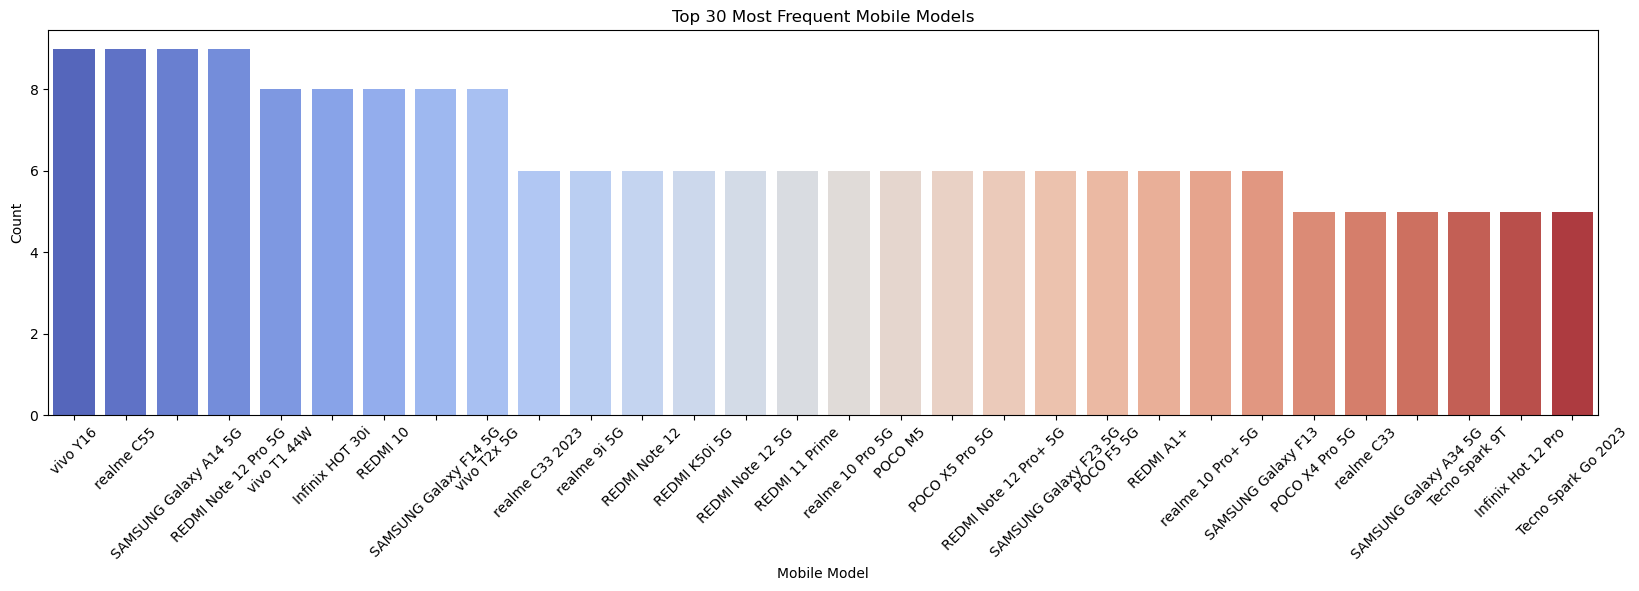

In [11]:
top_models = df["Model"].value_counts().nlargest(30)
plt.figure(figsize=(20, 5))
sns.barplot(x=top_models.index, y=top_models.values, palette="coolwarm")  
plt.xticks(rotation=45)
plt.xlabel("Mobile Model") 
plt.ylabel("Count")  
plt.title("Top 30 Most Frequent Mobile Models")
plt.show()

In [12]:
df['Model'].unique()

array(['Infinix SMART 7', 'MOTOROLA G32', 'POCO C50', 'Infinix HOT 30i',
       'REDMI 10', 'SAMSUNG Galaxy F13', 'SAMSUNG Galaxy F04', 'POCO C51',
       'MOTOROLA e13', 'vivo T2x 5G', 'Infinix Smart 7 HD', 'REDMI A1+',
       'POCO C55', 'MOTOROLA g13', 'POCO M4 5G', 'MOTOROLA e32',
       'vivo T2 5G', 'MOTOROLA G62 5G', 'POCO M5', 'realme C33 2023',
       'SAMSUNG Galaxy F14 5G', 'MOTOROLA g73 5G', 'realme C30',
       'POCO X5 5G', 'POCO M4 Pro', 'REDMI 11 Prime', 'realme C55',
       'realme 10 Pro 5G', 'Micromax IN 2C', 'POCO M4 Pro 5G',
       'realme Narzo 30 Pro 5G', 'micromax 2', 'Infinix Note 12 Pro 5G',
       'SAMSUNG Galaxy F23 5G', 'micromax', 'MOTOROLA Edge 40',
       'micromax 1', 'realme Narzo 30', 'Infinix NOTE 12i', 'realme 10',
       'realme 8i', 'Micromax 3', 'Google Pixel 6a', 'Infinix HOT 20 5G',
       'realme GT 2', 'REDMI Note 12', 'REDMI Note 12 5G', 'micromax 3',
       'SAMSUNG Galaxy M04', 'REDMI K50i 5G', 'MOTOROLA e40',
       'REDMI 9 Activ', 'MOTO

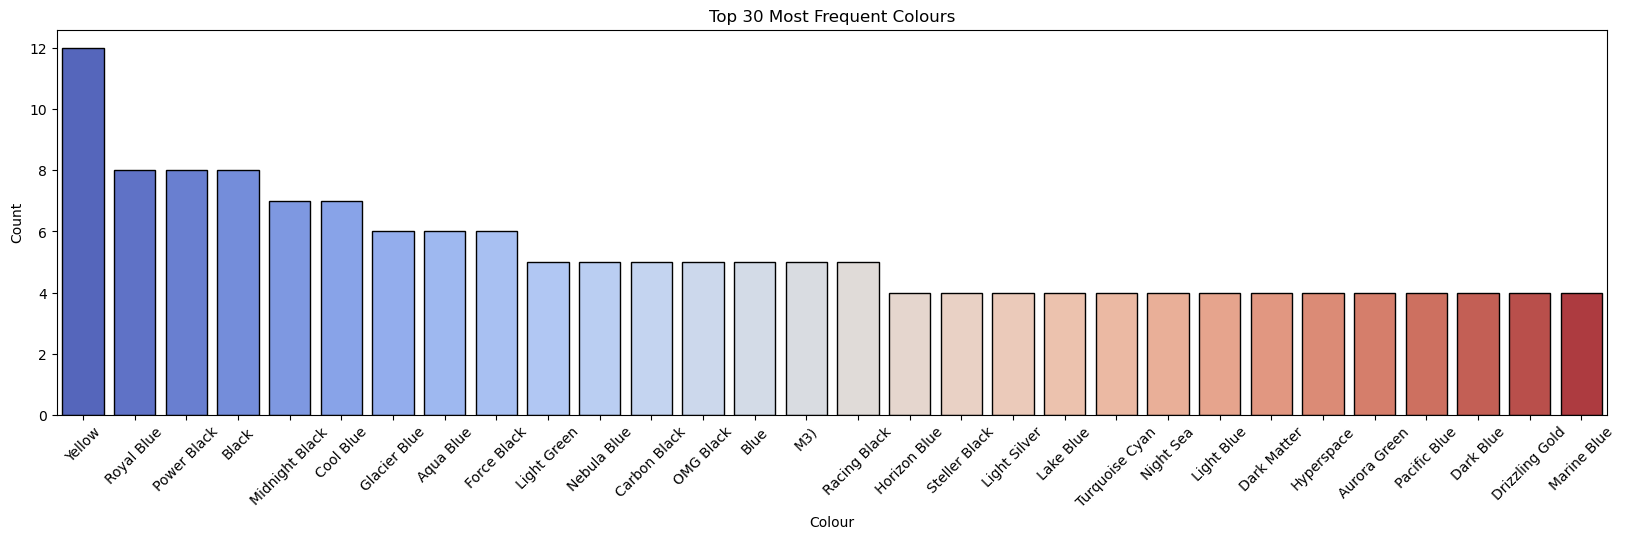

In [13]:
top_Colour = df["Colour"].value_counts().nlargest(30)
plt.figure(figsize=(20, 5))
sns.barplot(x=top_Colour.index, y=top_Colour.values, palette="coolwarm", edgecolor="black")
plt.xticks(rotation=45)
plt.xlabel("Colour")  
plt.ylabel("Count")  
plt.title("Top 30 Most Frequent Colours")
plt.show()

In [14]:
df['Colour'].unique()

array(['Night Black', 'Azure Blue', 'Mineral Gray', 'Royal Blue',
       'Marigold', 'Glacier Blue', 'Mirror Black', 'Diamond White',
       'Shadow Black', 'Emerald Green', 'Waterfall Blue', 'Opal Green',
       'Power Black', 'Country Green', 'Cosmic Black', 'Aurora Gold',
       'Marine Blue', 'Glimmer Black', 'Green Apple', 'Black',
       'Light Blue', 'Light Green', 'Cool Blue', 'Forest Green',
       'Nightsky Green', 'Matte Charcoal', 'Eco Black', 'Caribbean Green',
       'Jade Purple', 'Satin Silver', 'Sunrise Orange', 'Sunrise Copper',
       'Arctic Blue', 'Lavender Blue', 'Velocity Wave', 'Nitro Blaze',
       'Frosted Blue', 'Yellow', 'Midnight Gray', 'Creamy White',
       'Sandy Gold', 'Aqua Blue', 'GOAT Green', 'Midnight Blue',
       'Night Sea', 'Bamboo Green', 'Lake Blue', 'Denim Black',
       'Wildcat Blue', 'Icy Blue', 'Flashy Black', 'Sunshower',
       'Rainy Night', 'Rainforest', 'B.A.E. Purple', 'Peppy Purple',
       'Lucent White', 'Dark Matter', 'Nebula Bl

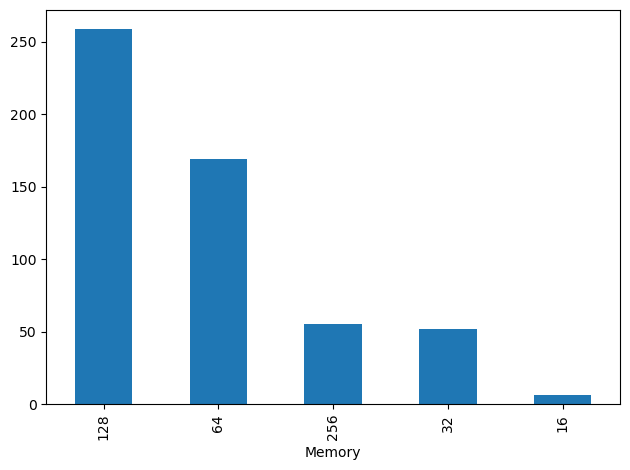

In [15]:
df["Memory"].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

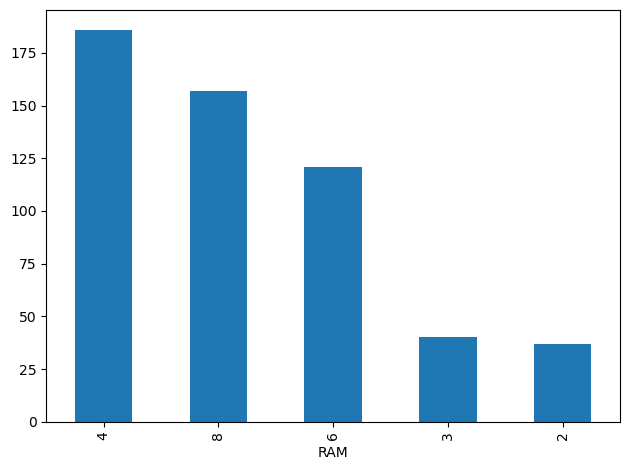

In [16]:
df["RAM"].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

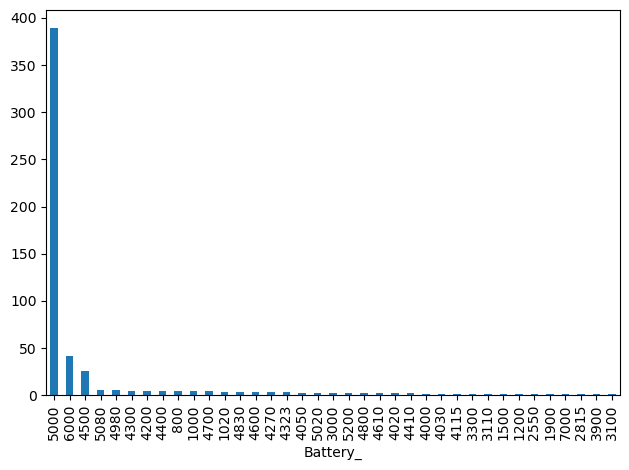

In [17]:
df['Battery_'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

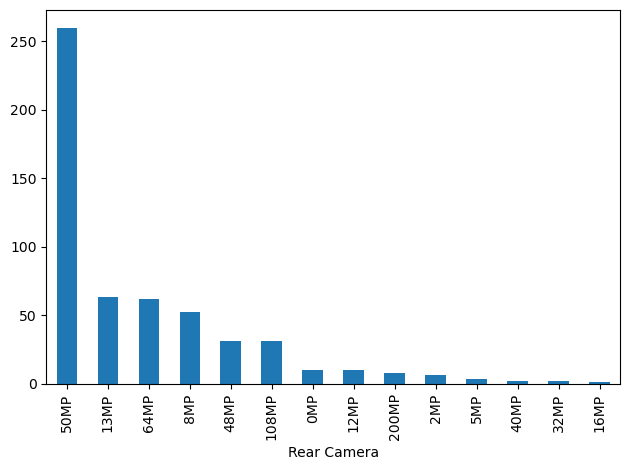

In [18]:
df["Rear Camera"].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

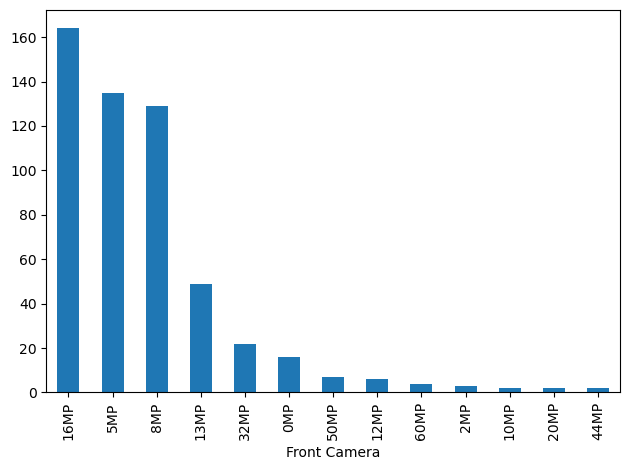

In [19]:
df["Front Camera"].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

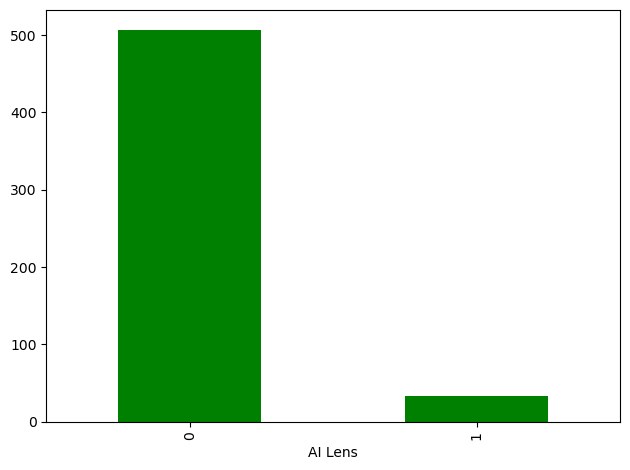

In [20]:
df["AI Lens"].value_counts().plot(kind='bar',color='green')
plt.tight_layout()
plt.show()

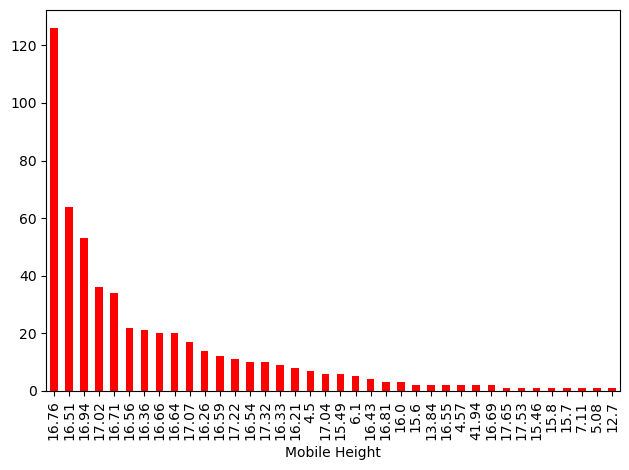

In [21]:
df["Mobile Height"].value_counts().plot(kind='bar',color='red')
plt.tight_layout()
plt.show()

In [22]:
df['Prize'].unique()

array(['7,299', '11,999', '5,649', '8,999', '7,999', '9,499', '10,699',
       '6,999', '15,999', '13,999', '12,999', '6,199', '6,599', '7,749',
       '9,699', '9,999', '10,999', '20,999', '15,499', '18,999', '12,499',
       '10,499', '14,490', '16,999', '6,499', '5,999', '6,299', '16,499',
       '14,499', '13,490', '19,999', '1,449', '1,849', '1,422', '29,999',
       '1,299', '17,999', '11,499', '2,615', '28,999', '23,999', '14,999',
       '2,490', '7,961', '2,499', '11,248', '6,799', '13,499', '8,749',
       '8,049', '1,375', '1,599', '7,499', '7,245', '26,999', '21,999',
       '17,499', '21,499', '7,115', '49,999', '32,999', '8,499', '25,999',
       '4,999', '3,549', '1,699', '920', '11,970', '1,199', '12,990',
       '6,978', '7,370', '44,999', '8,995', '24,999', '11,249', '34,999',
       '21,174', '43,999', '7,993', '8,069', '30,499', '30,999', '9,290',
       '8,449', '8,495', '29,499', '20,998', '19,280', '8,649', '19,499',
       '9,349', '8,288', '12,272', '6,794', '2

In [23]:
df.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')

In [24]:
df.head(2)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"


In [25]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

for i in numerical_cols:
    Q1 = df[i].quantile(0.25)
    print("The first quantile for the column", i, "is given by", Q1)
    
    Q2 = df[i].quantile(0.50)
    print("The second quantile for the column", i, "is given by", Q2)
    
    Q3 = df[i].quantile(0.75)
    print("The third quantile for the column", i, "is given by", Q3)
    
    IQR = Q3 - Q1
    print("The interquantile range for the column", i, "is given by", IQR)
    
    LL = Q1 - 1.5 * IQR
    print("The lower limit for the column", i, "is given by", LL)
    
    UL = Q3 + 1.5 * IQR
    print("The upper limit for the column", i, "is given by", UL)
    
    n = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print("The number of outliers for column", i, "is given by", n)
    
    # Replace outliers with the median
    df[i] = np.where((df[i] < LL) | (df[i] > UL), df[i].median(), df[i])
    
    m = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print("The number of outliers after imputation for column", i, "is given by", m)
    
    print()
    print()

The first quantile for the column Memory is given by 64.0
The second quantile for the column Memory is given by 128.0
The third quantile for the column Memory is given by 128.0
The interquantile range for the column Memory is given by 64.0
The lower limit for the column Memory is given by -32.0
The upper limit for the column Memory is given by 224.0
The number of outliers for column Memory is given by 55
The number of outliers after imputation for column Memory is given by 0


The first quantile for the column RAM is given by 4.0
The second quantile for the column RAM is given by 6.0
The third quantile for the column RAM is given by 8.0
The interquantile range for the column RAM is given by 4.0
The lower limit for the column RAM is given by -2.0
The upper limit for the column RAM is given by 14.0
The number of outliers for column RAM is given by 0
The number of outliers after imputation for column RAM is given by 0


The first quantile for the column Battery_ is given by 5000.0
The sec

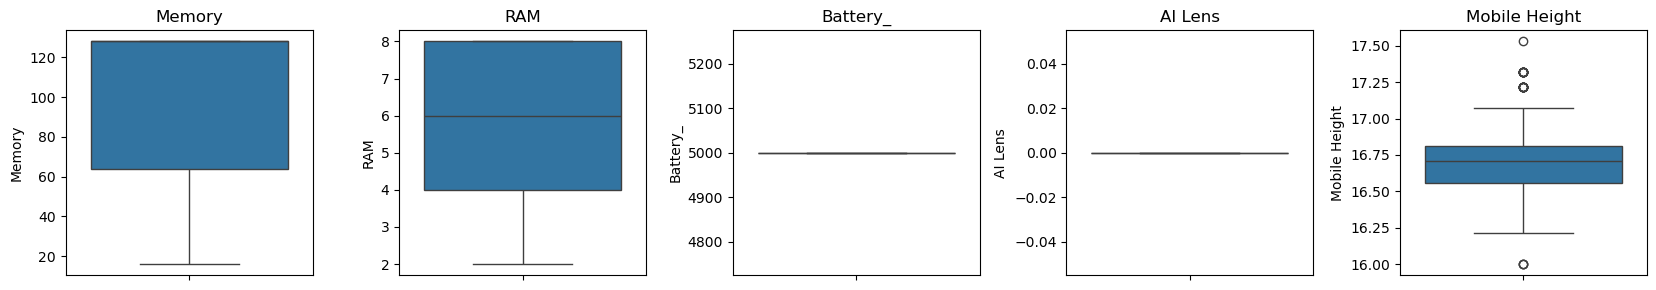

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numerical columns
numerical = df.select_dtypes(include=["number"]).columns

# Define number of rows and columns for subplots
num_cols = 6
num_rows = math.ceil(len(numerical) / num_cols)

# Create the figure
plt.figure(figsize=(20, num_rows * 3))

# Loop through each numerical column
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col])  # Boxplot for each numerical column
    plt.title(col)  # Set the title for each subplot

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [28]:
print(df['Prize'].dtype)
df['Prize'] = pd.to_numeric(df['Prize'], errors='coerce')
df['Prize'] = df['Prize'].fillna(0)  # Example: fill with 0
result = df.agg({'Prize': 'median'})
print(result)


object
Prize    0.0
dtype: float64


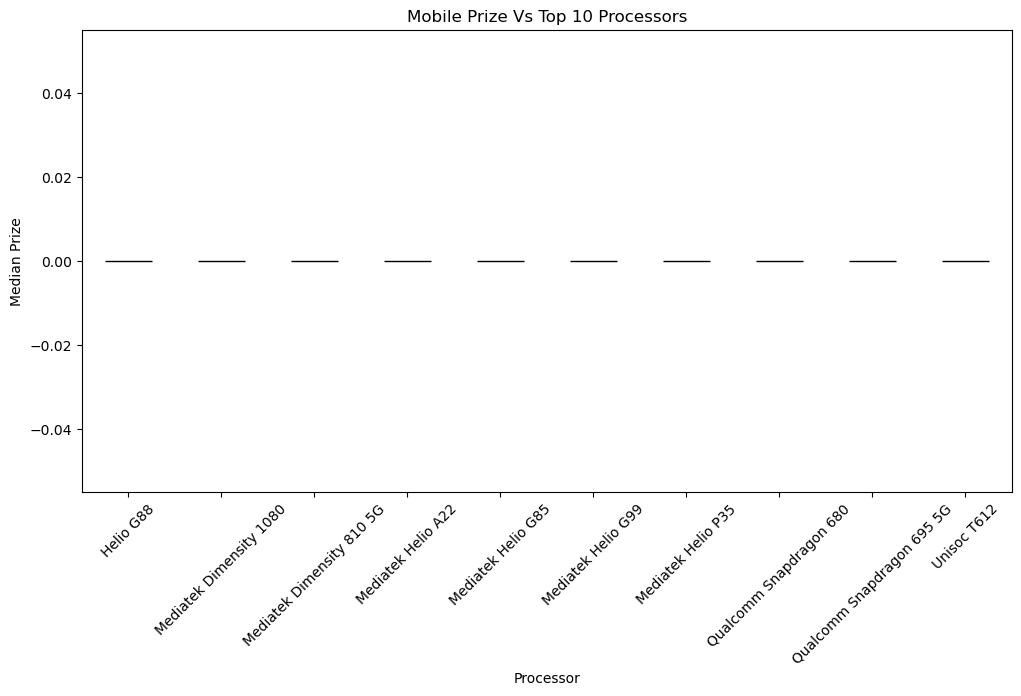

In [29]:
top_processors = df["Processor_"].value_counts().nlargest(10).index

# Filter the DataFrame for the top 10 processors
filtered_df = df[df["Processor_"].isin(top_processors)]

# Calculate the median prices for the filtered processors
median_prizes = filtered_df.groupby("Processor_")["Prize"].median()

# Create a bar plot
plt.figure(figsize=(12, 6))
median_prizes.sort_values().plot(kind="bar", color='pink', edgecolor="black")

# Add labels and title
plt.xlabel("Processor")  
plt.ylabel("Median Prize")  
plt.title("Mobile Prize Vs Top 10 Processors")
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [30]:
from scipy.stats.mstats import winsorize

outlier_columns = ['Prize']

def winsorize_outliers(df, columns, limit=0.05):
    df_clen = df.copy()
    for col in columns:
        df_clen[col] = winsorize(df_clen[col], limits=[limit, limit])
    return df_clen

In [31]:
df_clen = winsorize_outliers(df, outlier_columns)
print(df_clen[outlier_columns].describe())

       Prize
count  541.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0


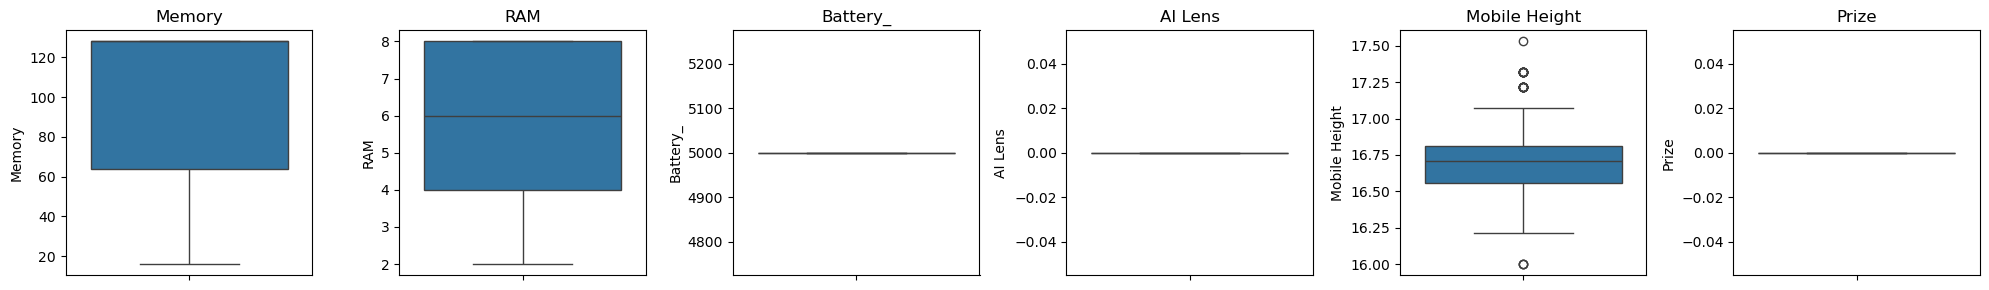

In [32]:
# Select numerical columns
numerical = df_clen.select_dtypes(include=["number"]).columns

# Define number of rows and columns for subplots
num_cols = 6
num_rows = math.ceil(len(numerical) / num_cols)

# Create the figure
plt.figure(figsize=(20, num_rows * 3))

# Loop through each numerical column
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df_clen[col])  # Boxplot for each numerical column
    plt.title(col)  # Set the title for each subplot

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [33]:
num_column=df.select_dtypes(include=['float64','int64','int32']).columns
skewness = df[num_column].skew
print(skewness)


<bound method DataFrame.skew of      Memory  RAM  Battery_  AI Lens  Mobile Height  Prize
0      64.0  4.0    5000.0      0.0          16.76    0.0
1      64.0  4.0    5000.0      0.0          16.76    0.0
2     128.0  8.0    5000.0      0.0          16.64    0.0
3      32.0  2.0    5000.0      0.0          16.56    0.0
4     128.0  8.0    5000.0      0.0          16.76    0.0
..      ...  ...       ...      ...            ...    ...
536   128.0  8.0    5000.0      0.0          16.71    0.0
537    32.0  2.0    5000.0      0.0          16.71    0.0
538    64.0  4.0    5000.0      0.0          16.76    0.0
539   128.0  8.0    5000.0      0.0          16.26    0.0
540   128.0  4.0    5000.0      0.0          16.66    0.0

[541 rows x 6 columns]>


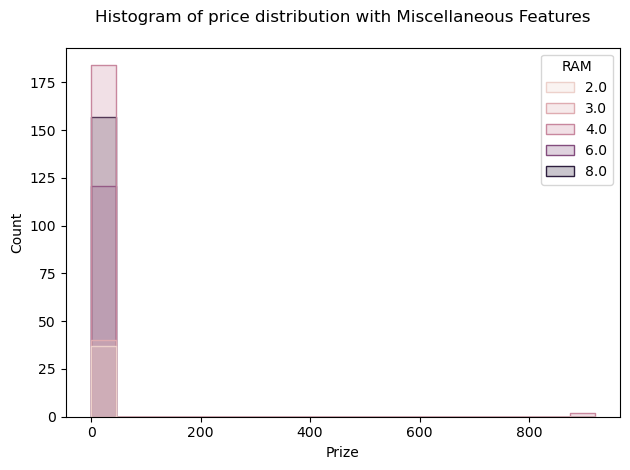

In [34]:
sns.histplot(data=df, x='Prize', bins=20, hue='RAM', element='step')
plt.title('Histogram of price distribution with Miscellaneous Features\n')
plt.tight_layout()
plt.show()

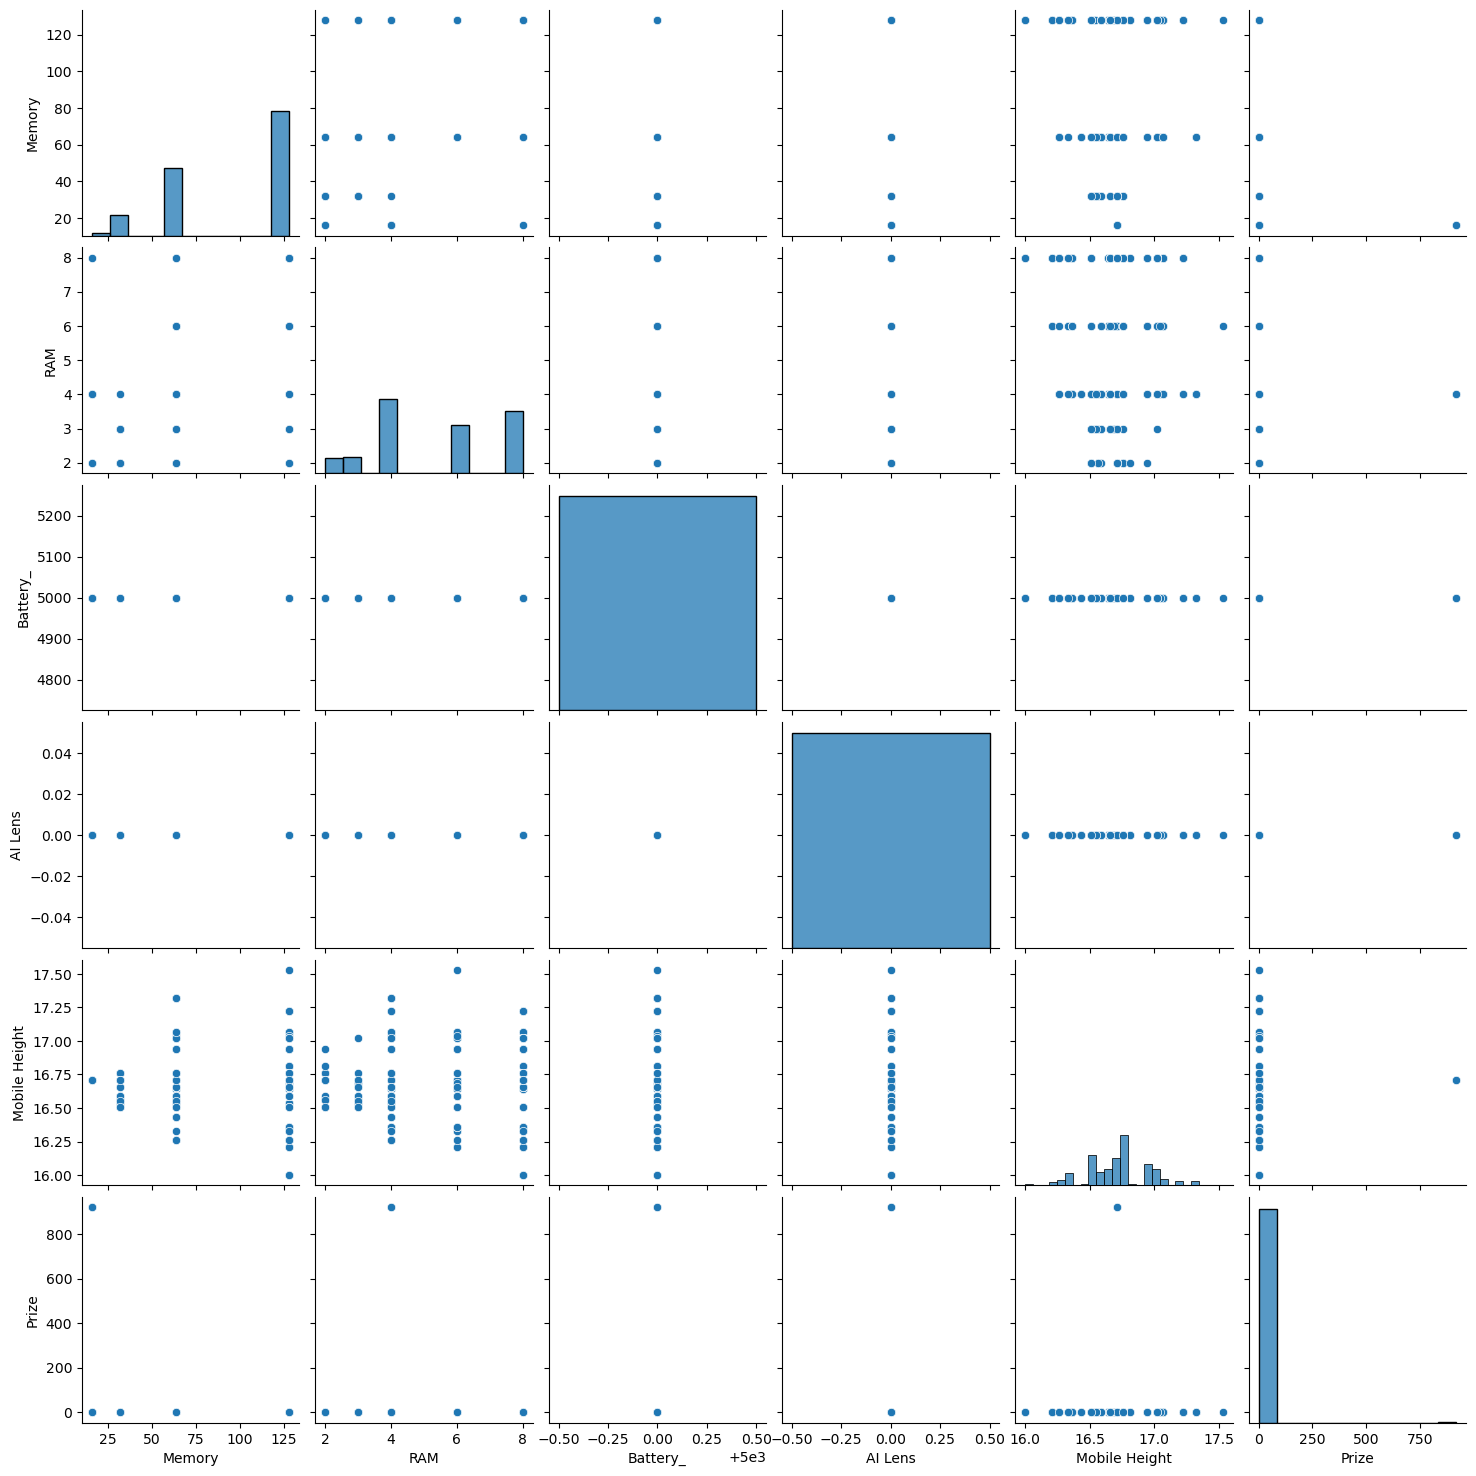

<Figure size 640x480 with 0 Axes>

In [35]:
sns.pairplot(df[['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera', 
                 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize']])
plt.show()
plt.suptitle('Pairplot: Relationships Between Features and Mobile Prices', y=1.02)
plt.show()

In [36]:
numerical_df = df.select_dtypes(include=["number"])
corr = numerical_df.corr()
print(corr)

                 Memory       RAM  Battery_  AI Lens  Mobile Height     Prize
Memory         1.000000  0.743366       NaN      NaN       0.089572 -0.133871
RAM            0.743366  1.000000       NaN      NaN       0.079700 -0.042924
Battery_            NaN       NaN       NaN      NaN            NaN       NaN
AI Lens             NaN       NaN       NaN      NaN            NaN       NaN
Mobile Height  0.089572  0.079700       NaN      NaN       1.000000 -0.002006
Prize         -0.133871 -0.042924       NaN      NaN      -0.002006  1.000000


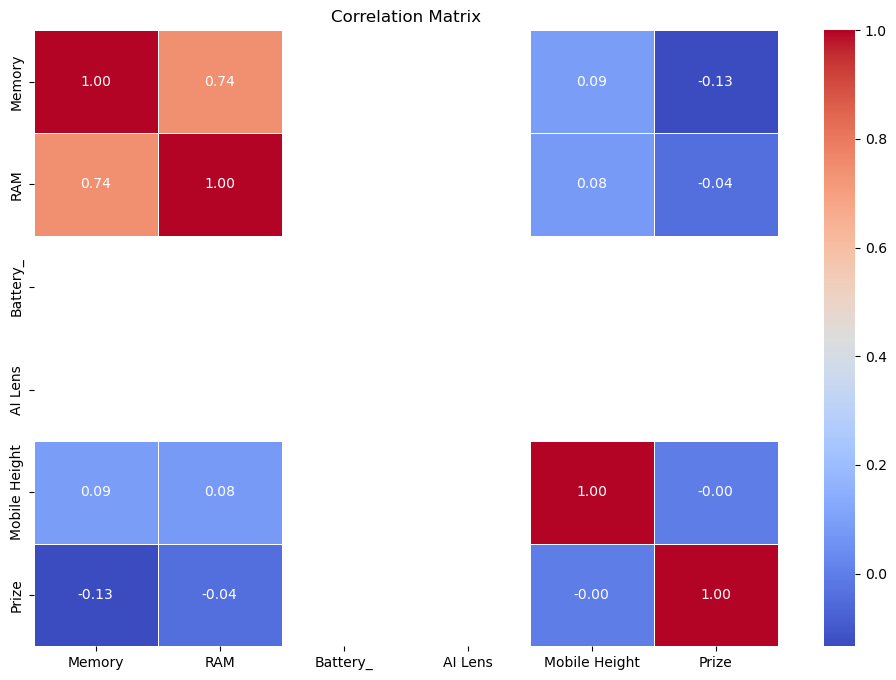

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [39]:
df['Rear_Camera_MP'] = df['Rear Camera'].str.replace('MP', '').astype(int)
df['Front_Camera_MP'] = df['Front Camera'].str.replace('MP', '').astype(int)
print(df[['Rear Camera', 'Front Camera', 'RAM']])

    Rear Camera Front Camera  RAM
0          13MP          5MP  4.0
1          13MP          5MP  4.0
2          50MP         16MP  8.0
3           8MP          5MP  2.0
4          50MP          5MP  8.0
..          ...          ...  ...
536        50MP         12MP  8.0
537         5MP          2MP  2.0
538        50MP          8MP  4.0
539        50MP         32MP  8.0
540        50MP          8MP  4.0

[541 rows x 3 columns]


In [40]:
df['price_per_ram'] = df['Prize'] / df['RAM']
df['price_per_memory'] = df['Prize'] / df['Memory']

In [41]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Rear_Camera_MP,Front_Camera_MP,price_per_ram,price_per_memory
0,Infinix SMART 7,Night Black,64.0,4.0,5000.0,13MP,5MP,0.0,16.76,Unisoc Spreadtrum SC9863A1,0.0,13,5,0.0,0.0
1,Infinix SMART 7,Azure Blue,64.0,4.0,5000.0,13MP,5MP,0.0,16.76,Unisoc Spreadtrum SC9863A1,0.0,13,5,0.0,0.0
2,MOTOROLA G32,Mineral Gray,128.0,8.0,5000.0,50MP,16MP,0.0,16.64,Qualcomm Snapdragon 680,0.0,50,16,0.0,0.0
3,POCO C50,Royal Blue,32.0,2.0,5000.0,8MP,5MP,0.0,16.56,Mediatek Helio A22,0.0,8,5,0.0,0.0
4,Infinix HOT 30i,Marigold,128.0,8.0,5000.0,50MP,5MP,0.0,16.76,G37,0.0,50,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,128.0,8.0,5000.0,50MP,12MP,0.0,16.71,Qualcomm Snapdragon 8 Gen 2,0.0,50,12,0.0,0.0
537,LAVA Z21,Cyan,32.0,2.0,5000.0,5MP,2MP,0.0,16.71,Octa Core,0.0,5,2,0.0,0.0
538,Tecno Spark 8T,Turquoise Cyan,64.0,4.0,5000.0,50MP,8MP,0.0,16.76,MediaTek Helio G35,0.0,50,8,0.0,0.0
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128.0,8.0,5000.0,50MP,32MP,0.0,16.26,"Exynos 1380, Octa Core",0.0,50,32,0.0,0.0


In [42]:
df.dtypes

Model                object
Colour               object
Memory              float64
RAM                 float64
Battery_            float64
Rear Camera          object
Front Camera         object
AI Lens             float64
Mobile Height       float64
Processor_           object
Prize               float64
Rear_Camera_MP        int32
Front_Camera_MP       int32
price_per_ram       float64
price_per_memory    float64
dtype: object

In [43]:
print(df.isna().sum())

Model               0
Colour              0
Memory              0
RAM                 0
Battery_            0
Rear Camera         0
Front Camera        0
AI Lens             0
Mobile Height       0
Processor_          0
Prize               0
Rear_Camera_MP      0
Front_Camera_MP     0
price_per_ram       0
price_per_memory    0
dtype: int64


In [44]:
le= LabelEncoder

In [45]:
categorical_cols = ['Model','Colour','Processor_']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [46]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Rear_Camera_MP,Front_Camera_MP,price_per_ram,price_per_memory
0,23,159,64.0,4.0,5000.0,13MP,5MP,0.0,16.76,113,0.0,13,5,0.0,0.0
1,23,20,64.0,4.0,5000.0,13MP,5MP,0.0,16.76,113,0.0,13,5,0.0,0.0
2,37,149,128.0,8.0,5000.0,50MP,16MP,0.0,16.64,75,0.0,50,16,0.0,0.0
3,69,201,32.0,2.0,5000.0,8MP,5MP,0.0,16.56,56,0.0,8,5,0.0,0.0
4,12,130,128.0,8.0,5000.0,50MP,5MP,0.0,16.76,14,0.0,50,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,128.0,8.0,5000.0,50MP,12MP,0.0,16.71,89,0.0,50,12,0.0,0.0
537,32,52,32.0,2.0,5000.0,5MP,2MP,0.0,16.71,68,0.0,5,2,0.0,0.0
538,123,259,64.0,4.0,5000.0,50MP,8MP,0.0,16.76,35,0.0,50,8,0.0,0.0
539,110,17,128.0,8.0,5000.0,50MP,32MP,0.0,16.26,11,0.0,50,32,0.0,0.0


In [47]:
df = df.copy()
columns_to_drop = ['Rear Camera', 'Front Camera']
df = df.drop(columns=columns_to_drop)

In [48]:
df

,Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Prize,Rear_Camera_MP,Front_Camera_MP,price_per_ram,price_per_memory
0,23,159,64.0,4.0,5000.0,0.0,16.76,113,0.0,13,5,0.0,0.0
1,23,20,64.0,4.0,5000.0,0.0,16.76,113,0.0,13,5,0.0,0.0
2,37,149,128.0,8.0,5000.0,0.0,16.64,75,0.0,50,16,0.0,0.0
3,69,201,32.0,2.0,5000.0,0.0,16.56,56,0.0,8,5,0.0,0.0
4,12,130,128.0,8.0,5000.0,0.0,16.76,14,0.0,50,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,128.0,8.0,5000.0,0.0,16.71,89,0.0,50,12,0.0,0.0
537,32,52,32.0,2.0,5000.0,0.0,16.71,68,0.0,5,2,0.0,0.0
538,123,259,64.0,4.0,5000.0,0.0,16.76,35,0.0,50,8,0.0,0.0
539,110,17,128.0,8.0,5000.0,0.0,16.26,11,0.0,50,32,0.0,0.0


In [49]:
df.dtypes

Model                 int32
Colour                int32
Memory              float64
RAM                 float64
Battery_            float64
AI Lens             float64
Mobile Height       float64
Processor_            int32
Prize               float64
Rear_Camera_MP        int32
Front_Camera_MP       int32
price_per_ram       float64
price_per_memory    float64
dtype: object

                     Model    Colour    Memory       RAM  Battery_  AI Lens  \
Model             1.000000  0.106594  0.073237  0.005924       NaN      NaN   
Colour            0.106594  1.000000  0.079813  0.064503       NaN      NaN   
Memory            0.073237  0.079813  1.000000  0.743366       NaN      NaN   
RAM               0.005924  0.064503  0.743366  1.000000       NaN      NaN   
Battery_               NaN       NaN       NaN       NaN       NaN      NaN   
AI Lens                NaN       NaN       NaN       NaN       NaN      NaN   
Mobile Height    -0.265909  0.006141  0.089572  0.079700       NaN      NaN   
Processor_        0.036362 -0.068677 -0.161816 -0.108733       NaN      NaN   
Prize             0.081375 -0.004789 -0.133871 -0.042924       NaN      NaN   
Rear_Camera_MP    0.000340  0.053969  0.504907  0.439558       NaN      NaN   
Front_Camera_MP   0.048434  0.035167  0.467188  0.493861       NaN      NaN   
price_per_ram     0.081375 -0.004789 -0.133871 -0.04

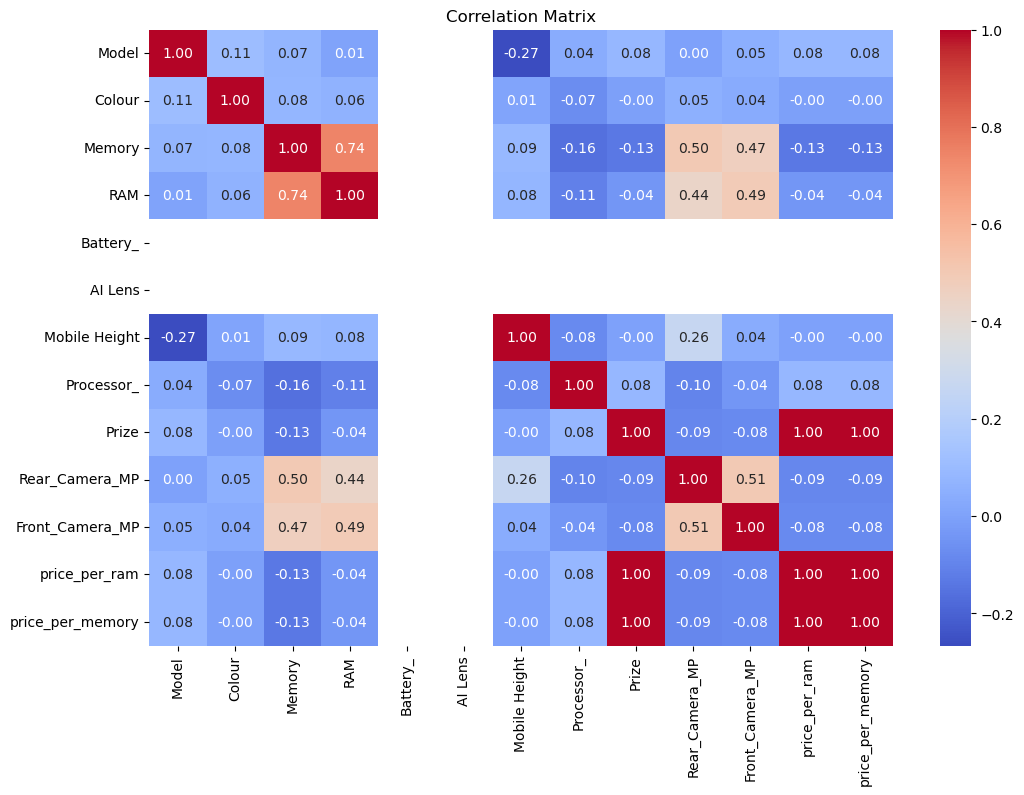

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()
print(corr)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


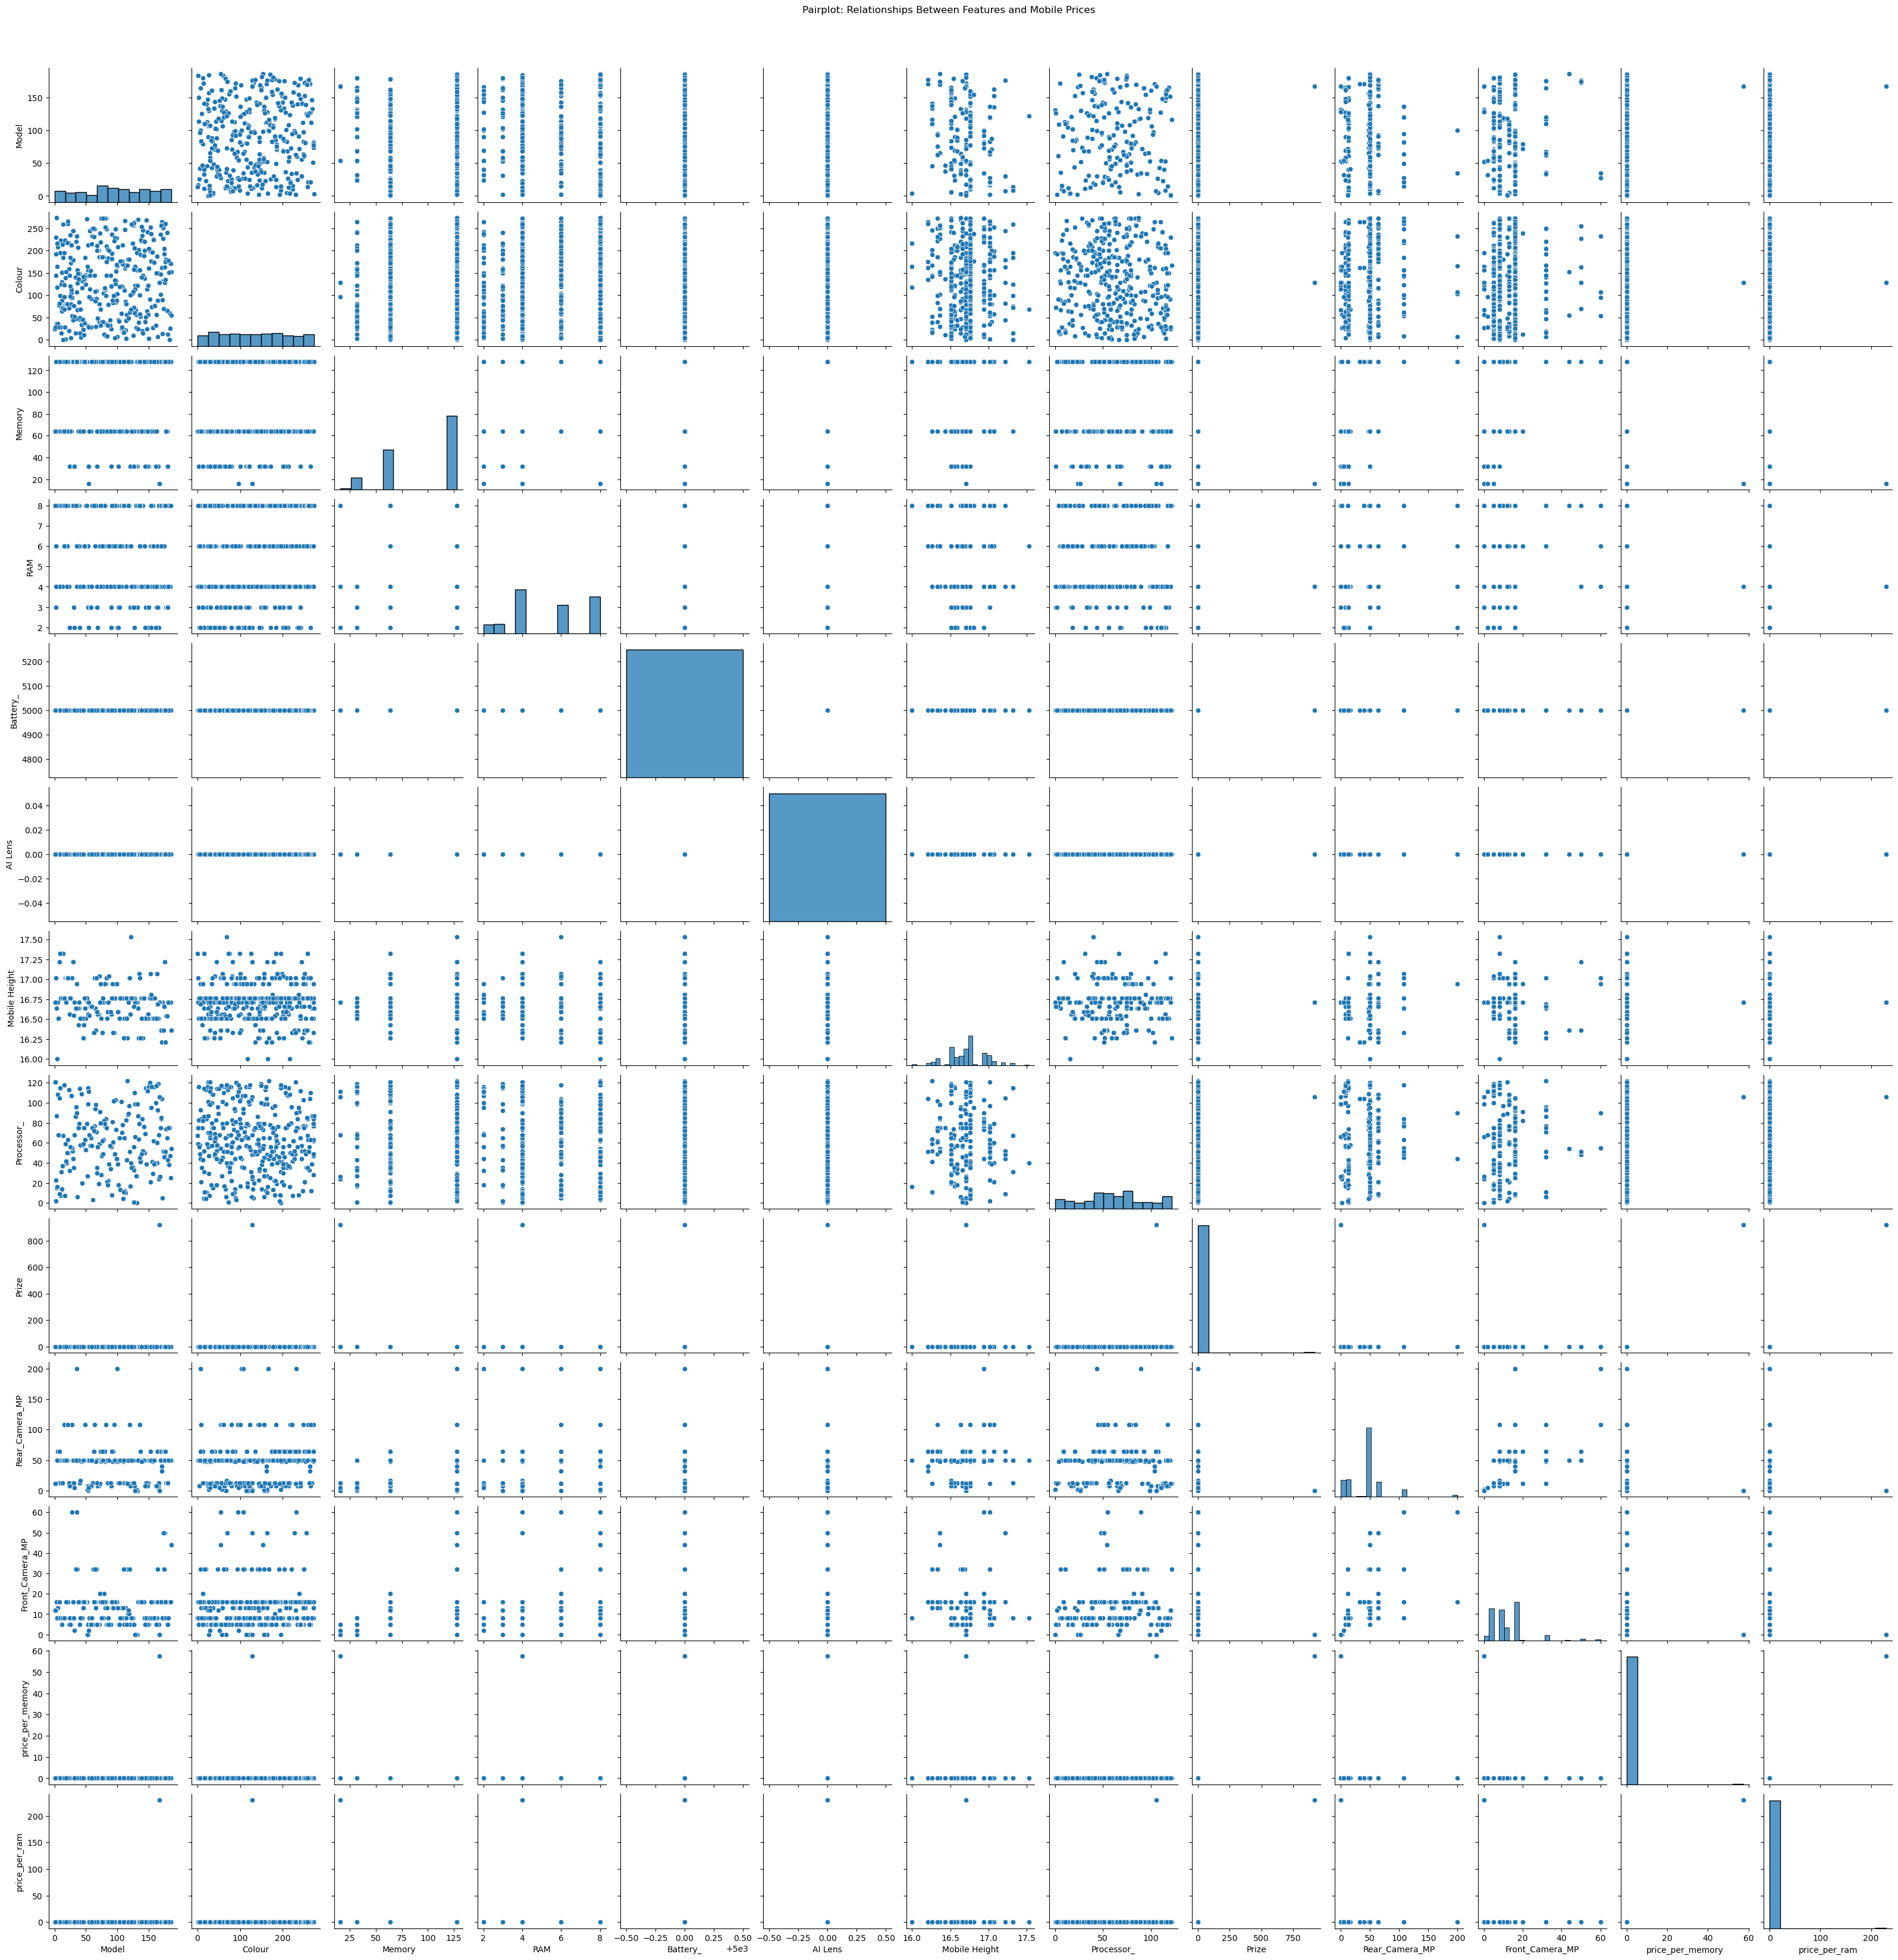

In [54]:
sns.pairplot(df[['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize', 'Rear_Camera_MP', 'Front_Camera_MP', 'price_per_memory', 'price_per_ram']])
plt.suptitle('Pairplot: Relationships Between Features and Mobile Prices', y=1.02) 
plt.show()


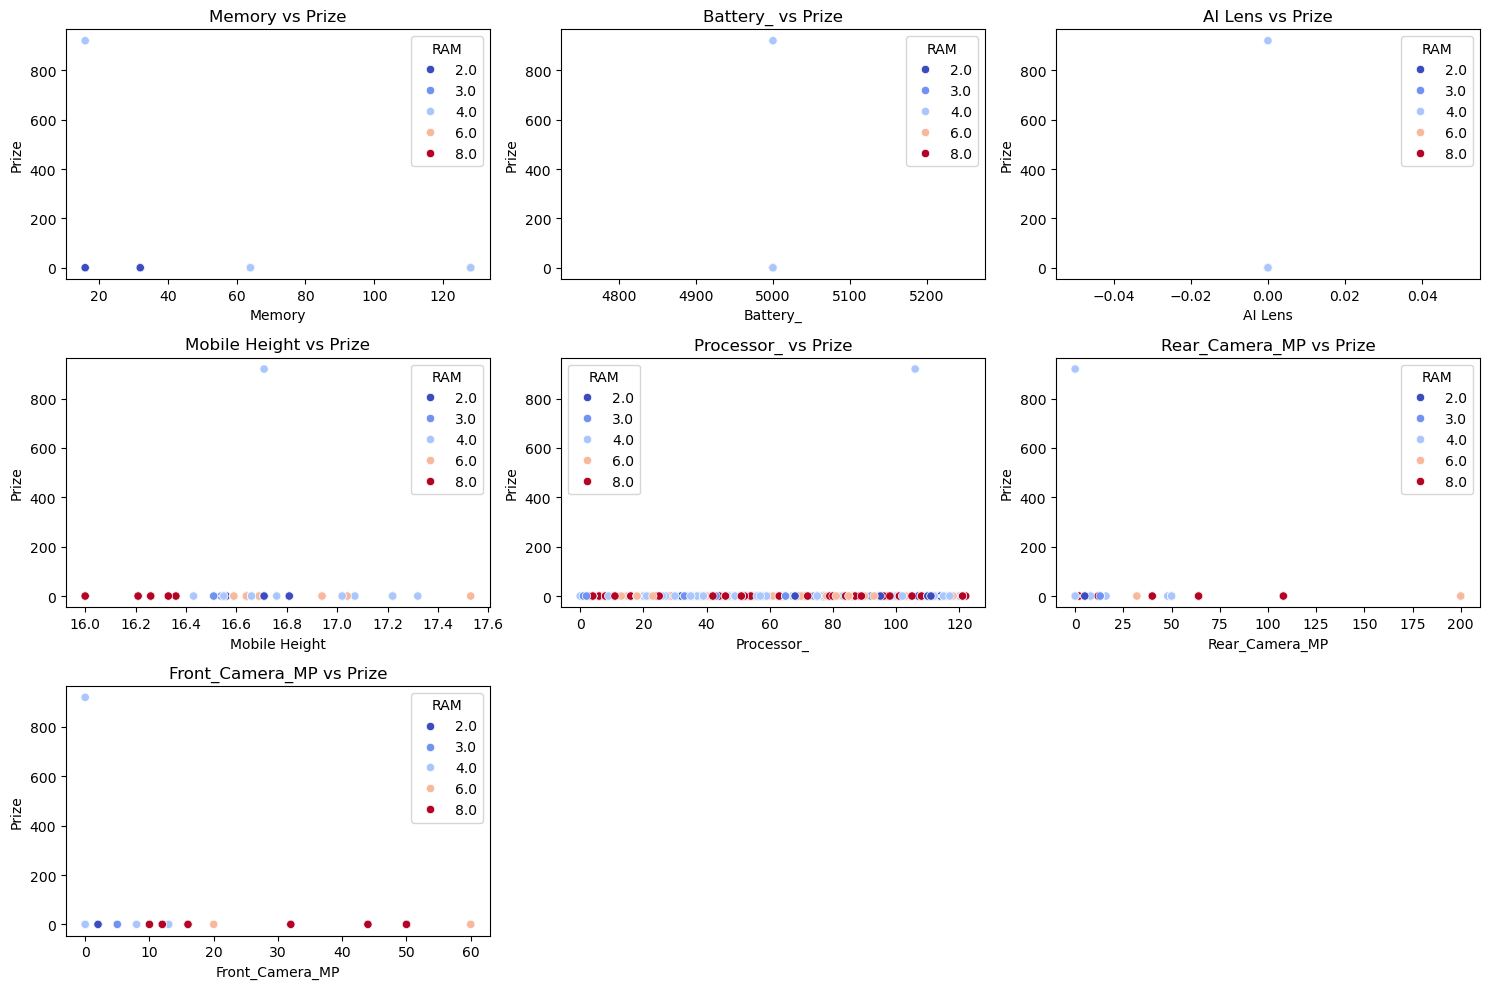

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
features = ['Memory', 'Battery_', 'AI Lens', 'Mobile Height', 'Processor_', 'Rear_Camera_MP', 'Front_Camera_MP']
for i, col in enumerate(features, 1):  # Fixed typo
    plt.subplot(3, 3, i)  # Keeps 3x3 grid
    sns.scatterplot(data=df, x=col, y='Prize', hue='RAM', palette='coolwarm')  # Fixed variable names
    plt.title(f'{col} vs Prize')  # Fixed title

plt.tight_layout()
plt.show()


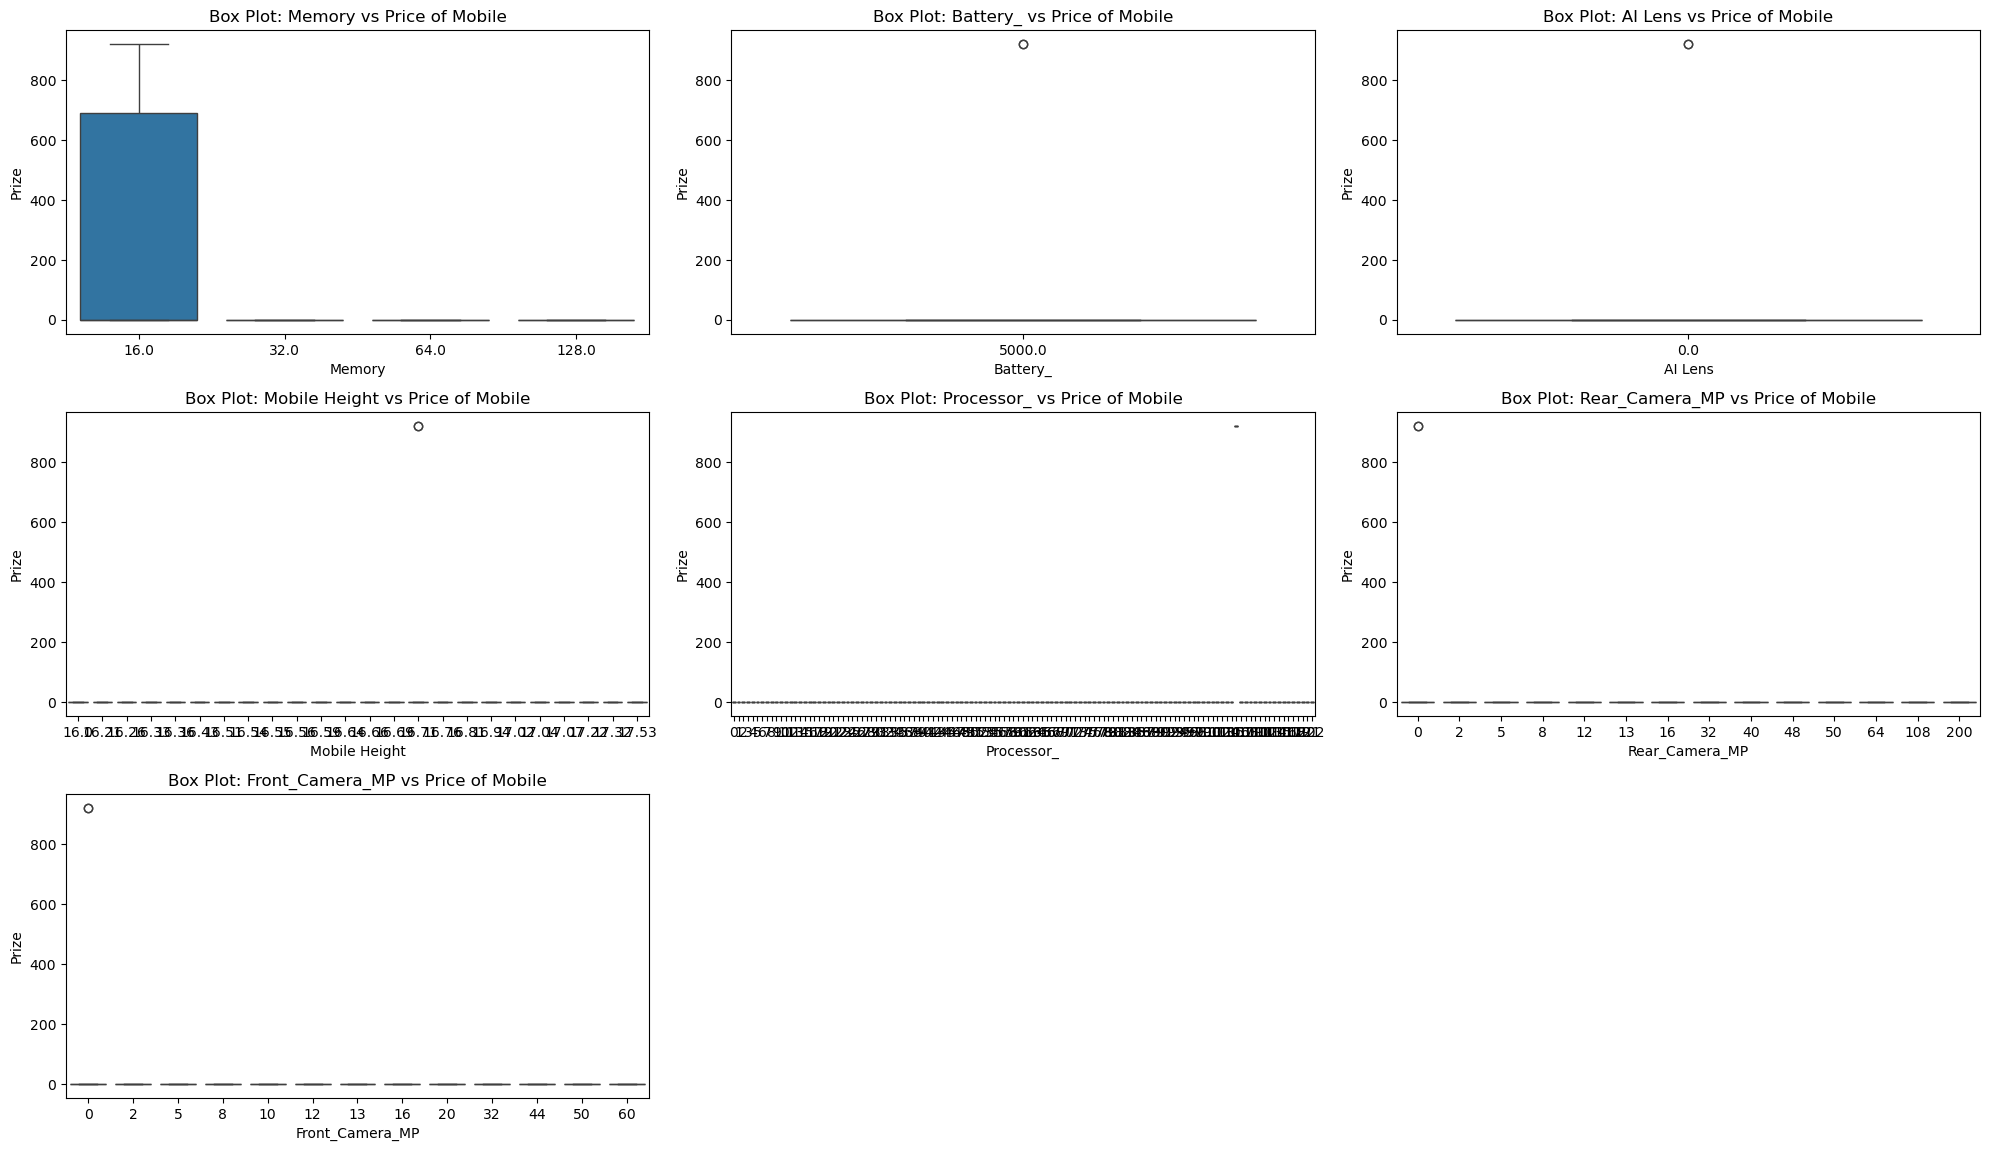

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
features = ['Memory', 'Battery_', 'AI Lens', 'Mobile Height', 'Processor_', 'Rear_Camera_MP', 'Front_Camera_MP']

for i, col in enumerate(features, 1):  # Added colon
    plt.subplot(4, 3, i)  # Fixed layout
    sns.boxplot(x=df[col], y=df['Prize'])  # Removed unnecessary brackets
    plt.title(f"Box Plot: {col} vs Price of Mobile")  # Fixed title

plt.tight_layout()
plt.show()  # Added parentheses


<Axes: ylabel='Count'>

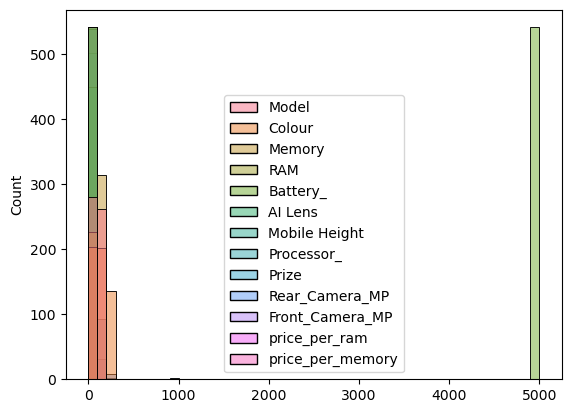

In [59]:
sns.histplot(df,bins=50)

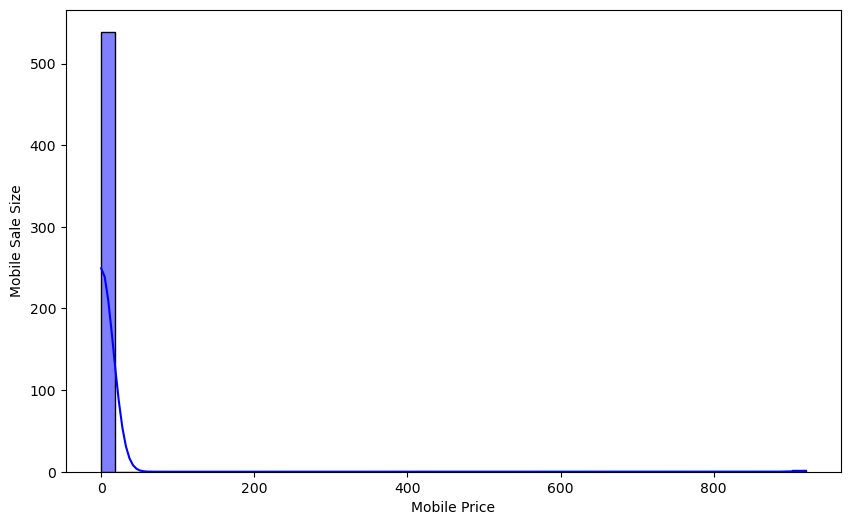

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Prize'], bins=50, kde=True, color='blue')
plt.xlabel('Mobile Price')
plt.ylabel('Mobile Sale Size')
plt.show()